In [1]:
import numpy as np

from scipy.spatial.distance import pdist, squareform

from inspect import signature

from functools import partial

from giotto.mapper import Eccentricity, OneDimensionalCover, ParallelClustering

from joblib import Parallel, delayed

from sklearn.base import BaseEstimator, ClusterMixin, TransformerMixin, clone
from sklearn.utils.validation import check_is_fitted
from sklearn.datasets import make_circles, make_moons
from sklearn.preprocessing import FunctionTransformer
from sklearn.cluster import DBSCAN

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
T = 10000
X = make_moons(n_samples=T, noise=.1)[0]
X_prec = squareform(pdist(X, metric='euclidean'))

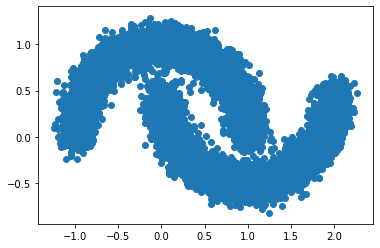

In [4]:
plt.scatter(X[:, 0], X[:, 1])

In [5]:
# def proj(x, coords=0):
#     if hasattr(coords, '__iter__'):
#         return x[:, coords]
#     return x[:, coords, None]

# filter_func = FunctionTransformer(func=partial(proj, coords=0), validate=False)

In [6]:
cover = OneDimensionalCover(n_intervals=50)

In [7]:
filter_func = Eccentricity()

In [8]:
filter_vals = filter_func.fit_transform(X) 
masks = OneDimensionalCover().fit_transform(filter_vals)
Xtot = [X, masks]

In [9]:
filter_func_prec = Eccentricity(metric='precomputed')

In [10]:
filter_vals_prec = filter_func_prec.fit_transform(X_prec) 
masks_prec = OneDimensionalCover().fit_transform(filter_vals_prec)
Xtot_prec = [X_prec, masks_prec]

In [11]:
np.array_equal(Xtot_prec[1], Xtot[1])

True

In [12]:
parClus = ParallelClustering()
parClus_prec = ParallelClustering(clusterer=DBSCAN(metric='precomputed'))

In [13]:
nodes = parClus.fit_transform(Xtot)
nodes_prec = parClus_prec.fit_transform(Xtot_prec)

In [19]:
for i, node in enumerate(nodes):
    for j, c in enumerate(node):
        assert np.array_equal(c[2], nodes_prec[i][j][2])